<a href="https://colab.research.google.com/github/eve-okorie16/sync-ml/blob/main/boston_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Boston house prediction using linear regression model and XGBoost regression model**

In [ ]:
!pip install scikit_learn

In [ ]:
#import relevant dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
datasets = pd.read_csv("BostonHousing.csv")
data = np.hstack(datasets.values[::2, :])
target = datasets.values[1::2, 2]


In [ ]:
print(datasets.keys())

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [ ]:
datasets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
datasets.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#check for missing values
datasets.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
#exploratory data analysis
datasets.describe()



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: xlabel='medv', ylabel='Count'>

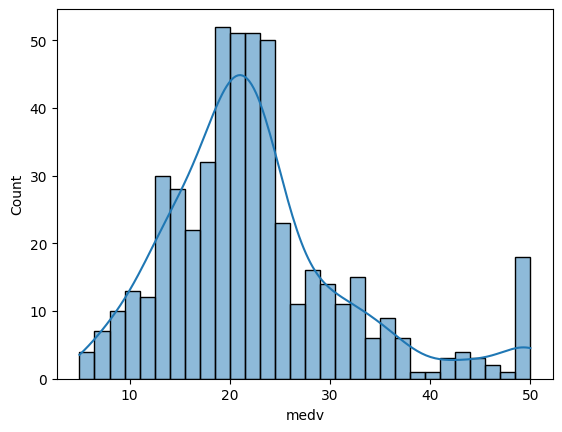

In [ ]:
#plot the distribution of the MEDV
sns.histplot(datasets['medv'], bins = 30, kde=True)


<Axes: >

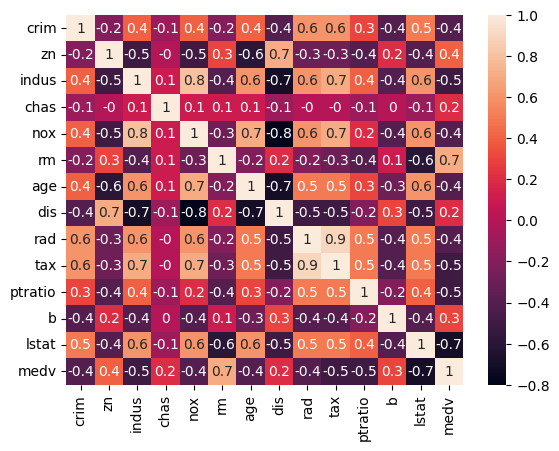

In [ ]:
#we create a correlation matrix that measures relationship between the variables using the heatmap
correlation_matrix = datasets.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True)

from the heatmap, it can be deduced that rm and lstat have higher correlation to medv(the price). so we use both as our selected features.

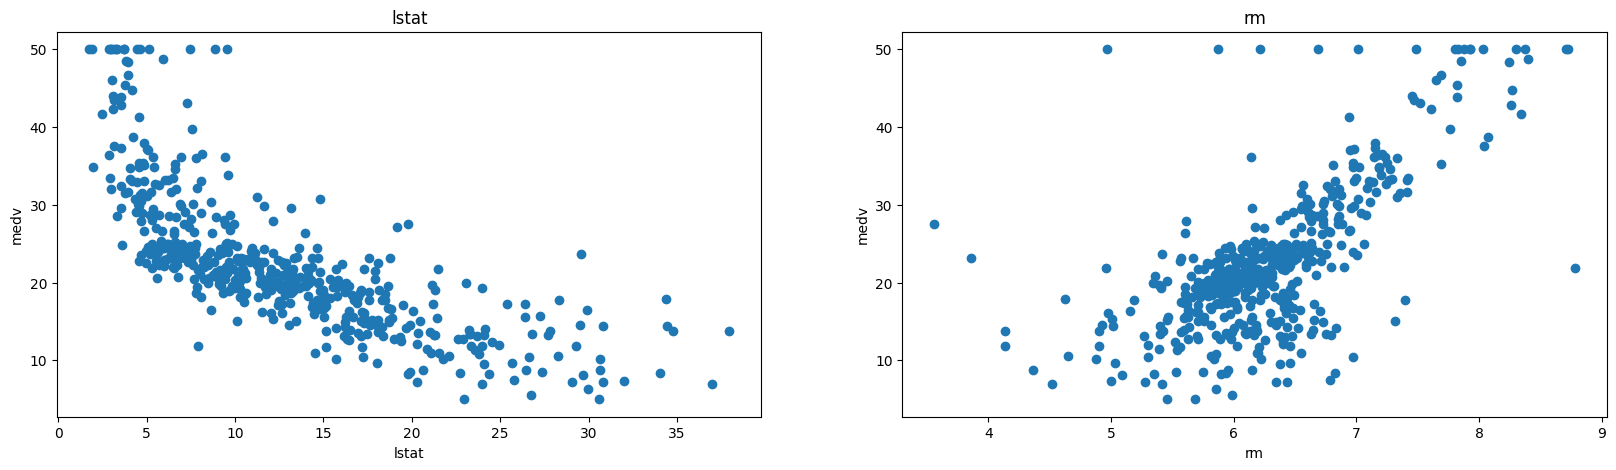

In [ ]:
#from the correlation matrix, we will select features that have high correlation with our target Medv and see how they vary by using scatterplot
plt.figure(figsize=(20,5))

features = ['lstat', 'rm']
target = datasets['medv']
#loop over the features
for i, col in enumerate(features):
  plt.subplot(1, len(features), i+1)
  x = datasets[col]
  y = target
  plt.scatter(x, y, marker='o')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('medv')


There is a positive correlation between the number of rooms and prices  which seems to be linear although with a few outliers. prices tend to decrease as lstat increases although not so linear

In [ ]:
#data preprocessing
X = pd.DataFrame(np.c_[datasets['lstat'], datasets['rm']], columns = ['lstat', 'rm'])
Y = datasets['medv']

we split the data into training and testing sets

In [ ]:
#import relevant dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#split into testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#evaluate model for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("the model performance for training set")
print('RMSE is {}' .format(rmse))
print('R2 score is {}' .format(r2))
print("\n")

#evaluate the model for the testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("the model performance for testing set")
print('RMSE is {}' .format(rmse))
print('R2 score is {}' .format(r2))
print("\n")



the model performance for training set
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


the model performance for testing set
RMSE is 5.137400784702911
R2 score is 0.6628996975186952




to compare actual price with predicted price with linear model

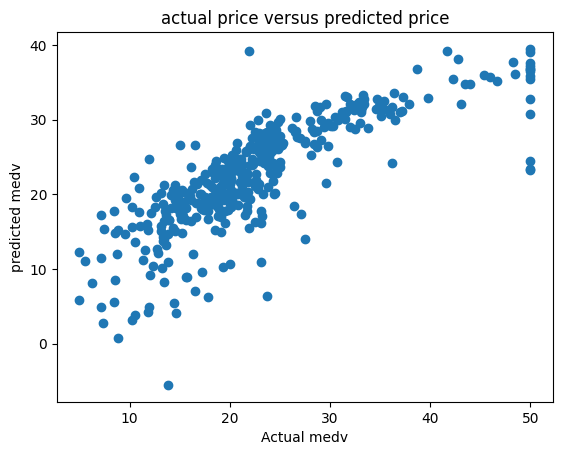

In [ ]:
plt.scatter(Y_train, y_train_predict)
plt.xlabel("Actual medv")
plt.ylabel("predicted medv")
plt.title("actual price versus predicted price")
plt.show()

using the xgboost regression model

In [ ]:
from xgboost import XGBRegressor

In [ ]:
#loading the model
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#model evaluation
#predict the training data
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[13.298388  49.685974   8.8961315 20.464352  12.217365  49.86949
 24.100512  16.53717   24.434727  23.926378  13.098282  30.395832
 15.293292  13.653197  25.87802   16.755789  18.823122  17.830093
 19.312088  33.331825  21.737293  17.297455  23.183538  26.305883
 21.430052  21.3758    19.061031  50.074615  49.9713    22.71152
 10.555907  17.622046  11.109027  21.332148  13.85629   10.569674
 22.5616    30.208256  19.442904  16.543276  20.217344  19.683641
 34.74336   49.33975   24.391254  18.883087  19.522621  22.404007
 13.503795  49.629833  11.597254  10.945936  24.166817  35.26124
 15.166483  24.357971  33.549355  31.74648   13.421361  34.889637
 14.144208  34.842705  25.188091  18.318121  17.267677  13.360446
 23.888796  27.44103   22.316826  18.086496  14.740462  20.899975
  8.615047  15.3767395 20.415176  32.25936   20.008121  18.672705
 28.643066  45.9728    22.154469  23.21859   21.981005  16.166311
 49.832695  24.686987  37.330315  21.688225  19.499113  17.964516
 22.390265  1

In [ ]:
r2 = r2_score(Y_train,training_data_prediction)

rmse =  (np.sqrt(mean_squared_error(Y_train, training_data_prediction)))

print("the model performance for training set")
print('RMSE is {}' .format(rmse))
print('R2 score is {}' .format(r2))
print("\n")

the model performance for training set
RMSE is 0.3933277354785568
R2 score is 0.9981990261906398




In [ ]:
#prediction on testing set
test_data_prediction = model.predict(X_test)

In [ ]:
r2 = r2_score(Y_test, test_data_prediction)

rmse =  (np.sqrt(mean_squared_error(Y_test, test_data_prediction)))

print("the model performance for testing set")
print('RMSE is {}' .format(rmse))
print('R2 score is {}' .format(r2))
print("\n")

the model performance for testing set
RMSE is 4.6860304435194475
R2 score is 0.7195325549627287




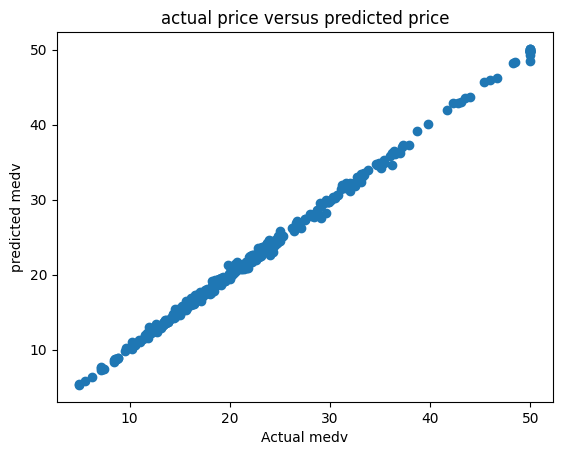

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual medv")
plt.ylabel("predicted medv")
plt.title("actual price versus predicted price")
plt.show()